In [5]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 10)
import requests
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.path import Path

Populating the interactive namespace from numpy and matplotlib


In [6]:
def draw(base, size):
    verts = [
        (base[1], base[0]), # left, bottom
        (base[1], base[0] + size[0]), # left, top
        (base[1] + size[1], base[0] + size[0]), # right, top
        (base[1] + size[1], base[0]), # right, bottom
        (0., 0.), # ignored
        ]

    codes = [Path.MOVETO,
             Path.LINETO,
             Path.LINETO,
             Path.LINETO,
             Path.CLOSEPOLY,
             ]
    
    path = Path(verts, codes)
    
    return path

In [66]:
def check(inp, out):    
    k = int(inp[0].strip())
    m = int(inp[1].strip())
    n = int(inp[2].strip())
    o = int(inp[3].strip())
    rect = [list(map(int, l.strip().split(" "))) for l in inp[4:]]
    rect = {x[0]:x[1:] for x in rect}
    
    places = [list(map(int, l.strip().split(" "))) for l in out]
    
    volume = 0
    for r in rect.values():
        volume += r[0] * r[1] * r[2]
    
    fig, axes = plt.subplots(1, o)
    
    for couche, ax in zip(range(o), axes):

        major_ticks = list(range(0, max(m,n), 5))
        minor_ticks = list(range(0, max(m,n), 1))

        ax.set_xticks(major_ticks)                                                       
        ax.set_xticks(minor_ticks, minor=True)                                           
        ax.set_yticks(major_ticks)                                                       
        ax.set_yticks(minor_ticks, minor=True)    

        ax.grid(which='minor', alpha=0.7)                                                
        ax.grid(which='major', alpha=1)    
    
    
        if volume < m*n*o:
            ax.add_patch(patches.PathPatch(draw([0,0],[n,m]), facecolor='lightgrey', lw=2))
        else:
            ax.add_patch(patches.PathPatch(draw([0,0],[n,m]), facecolor='blue', lw=2))

        for (id, h, w, p) in places:
            base_h, base_w, base_p = rect[id]
            if p <= couche < p+base_p:
                
                ax.add_patch(patches.PathPatch(draw([h, w],[base_h, base_w]), facecolor='red', lw=2, alpha=0.4))
                ax.text(w + 0.2, h + 0.2, str(id), fontsize=10)

        ax.set_xlim(-1,m + 1)
        ax.set_ylim(-1,n + 1)
        ax.set_aspect('equal', adjustable='box')
        ax.set_title("Couche %i" %couche)
    plt.show()
    
    return "Volume des pièces : %i, volume du pavé: %i. Volume possible: %s" % (volume, m*n*o, "oui" if volume < m*n*o else "non")

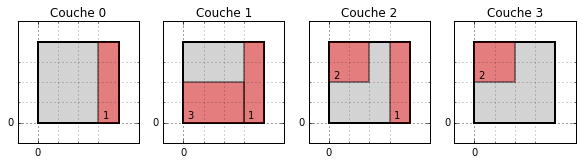

'Volume des pièces : 26, volume du pavé: 64. Volume possible: oui'

In [67]:
inp = """3
4
4
4
1 4 1 3
2 2 2 2
3 2 3 1""".split("\n")

out = """1 0 3 0
2 2 0 2
3 0 0 1""".split("\n")

check(inp, out)

In [ ]:
def internet(i,o):
    data = requests.get("http://paste.awesom.eu/raw/" + i).text.strip().replace("\r", "").replace("  ", " ").replace("  ", " ").replace("  ", " ").replace("  ", " ").replace("  ", " ").replace("  ", " ").replace("  ", " ").split("\n")
    out = requests.get("http://paste.awesom.eu/raw/" + o).text.strip().replace("\r", "").replace("  ", " ").replace("  ", " ").replace("  ", " ").replace("  ", " ").replace("  ", " ").replace("  ", " ").replace("  ", " ").split("\n")

    return check(data, out)

In [ ]:
internet("Njwg", "rXYV")